<a href="https://colab.research.google.com/github/jainprashant03/ML_projects/blob/Tutorials%40Udemy/Workbook_som.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Self-Organizing Maps

## Importing the libraries

In [ ]:
!pip install minisom

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

## Training the SOM

In [ ]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15,sigma=1,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

## Visualizing the results

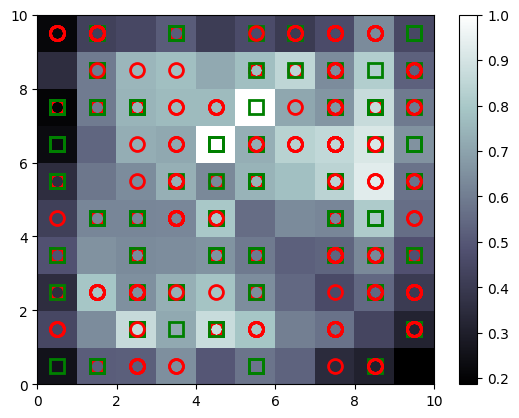

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i,x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth=2)
show()

## Finding the frauds

In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,6)],mappings[(5,7)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [ ]:
frauds

array([[1.5699340e+07, 1.0000000e+00, 2.3170000e+01, 0.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.0000000e+00, 1.8400000e+02, 1.0000000e+00],
       [1.5684440e+07, 1.0000000e+00, 3.3670000e+01, 2.1650000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.5000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.0000000e+00, 1.2000000e+02, 1.0000000e+00],
       [1.5778589e+07, 1.0000000e+00, 2.0420000e+01, 0.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.0000000e+00, 1.8400000e+02, 1.0000000e+00],
       [1.5621423e+07, 1.0000000e+00, 2.5670000e+01, 1.2500000e+01,
        2.0000000e+00, 1.3000000e+01, 4.0000000e+00, 1.2100000e+00,
        1.0000000e+00, 1.0000000e+00, 6.7000000e+01, 1.0000000e+00,
        2.0000000e+00,